In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

In [2]:
phyl = pd.read_csv("out_phyl.csv")

In [3]:
phyl

,1,2,3,4,5,6,7,8,9,10,...,243,244,245,246,247,248,249,250,251,252
0,0.000000,0.020364,0.022568,0.024713,0.023570,0.023615,0.024607,0.021254,0.022047,0.022868,...,0.022062,0.032975,0.034126,0.034768,0.028960,0.026797,0.026272,0.024387,0.028972,0.031496
1,0.020364,0.000000,0.010615,0.012760,0.011618,0.011662,0.013878,0.007727,0.011692,0.012513,...,0.023655,0.028806,0.029957,0.030598,0.024791,0.022628,0.022102,0.020217,0.024803,0.027327
2,0.022568,0.010615,0.000000,0.011632,0.010489,0.010534,0.016081,0.011505,0.013896,0.014717,...,0.025858,0.031009,0.032161,0.032802,0.026995,0.024831,0.024306,0.022421,0.027007,0.029530
3,0.024713,0.012760,0.011632,0.000000,0.001429,0.002798,0.018226,0.013650,0.016041,0.016862,...,0.028003,0.033155,0.034306,0.034947,0.029140,0.026977,0.026451,0.024566,0.029152,0.031675
4,0.023570,0.011618,0.010489,0.001429,0.000000,0.001656,0.017084,0.012507,0.014898,0.015719,...,0.026861,0.032012,0.033163,0.033804,0.027997,0.025834,0.025309,0.023423,0.028009,0.030533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.026797,0.022628,0.024831,0.026977,0.025834,0.025878,0.026870,0.023517,0.024310,0.025131,...,0.030087,0.031806,0.032958,0.033599,0.027792,0.000000,0.008504,0.004719,0.007447,0.030327
248,0.026272,0.022102,0.024306,0.026451,0.025309,0.025353,0.026345,0.022992,0.023785,0.024606,...,0.029562,0.031281,0.032433,0.033074,0.027267,0.008504,0.000000,0.006093,0.010679,0.029802
249,0.024387,0.020217,0.022421,0.024566,0.023423,0.023468,0.024460,0.021107,0.021900,0.022721,...,0.027677,0.029396,0.030547,0.031189,0.025381,0.004719,0.006093,0.000000,0.006895,0.027917
250,0.028972,0.024803,0.027007,0.029152,0.028009,0.028053,0.029046,0.025692,0.026485,0.027306,...,0.032263,0.033982,0.035133,0.035774,0.029967,0.007447,0.010679,0.006895,0.000000,0.032503


In [4]:
colour = pd.read_csv("examples/globins/globin_colors_new.csv")

In [5]:
colour

,proteins_id,tree1,tree2,tree3,tree4,full_name,short_name,full_species,short_species,evo_distance,Color_species,Domain,Kingdom,Phylum,Subphylum,Class,Genus
0,1,5,3,3,2,"Globin C, coelomic",Globin,Caudina arenicola,Caudina,2.101128,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Other,Other
1,2,-1,28,18,10,Globin (Fragment),Globin,Stegodyphus mimosarum,Stegodyphus,1.757280,Arthropoda,Eukaryota,Metazoa,Arthropoda,Chelicerata,Arachnida,Other
2,3,-1,27,18,10,Uncharacterized protein,Uncharacterized,Strigamia maritima,Strigamia,2.041487,Arthropoda,Eukaryota,Metazoa,Arthropoda,Other,Other,Other
3,4,37,27,18,10,Uncharacterized protein,Uncharacterized,Scylla olivacea,Scylla,2.318169,Arthropoda,Eukaryota,Metazoa,Arthropoda,Crustacea,Malacostraca,Other
4,5,37,27,18,10,Uncharacterized protein,Uncharacterized,Scylla olivacea,Scylla,2.170775,Arthropoda,Eukaryota,Metazoa,Arthropoda,Crustacea,Malacostraca,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,14,10,9,3,Uncharacterized protein,Uncharacterized,Strongylocentrotus purpuratus,Strongylocentrotus,2.586926,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Echinoidea,Strongylocentrotus
248,249,-1,10,9,3,Uncharacterized protein,Uncharacterized,Strongylocentrotus purpuratus,Strongylocentrotus,2.519191,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Echinoidea,Strongylocentrotus
249,250,14,10,9,3,Uncharacterized protein,Uncharacterized,Strongylocentrotus purpuratus,Strongylocentrotus,2.276065,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Echinoidea,Strongylocentrotus
250,251,14,10,9,3,Uncharacterized protein,Uncharacterized,Strongylocentrotus purpuratus,Strongylocentrotus,2.867471,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Echinoidea,Strongylocentrotus


## T-sne

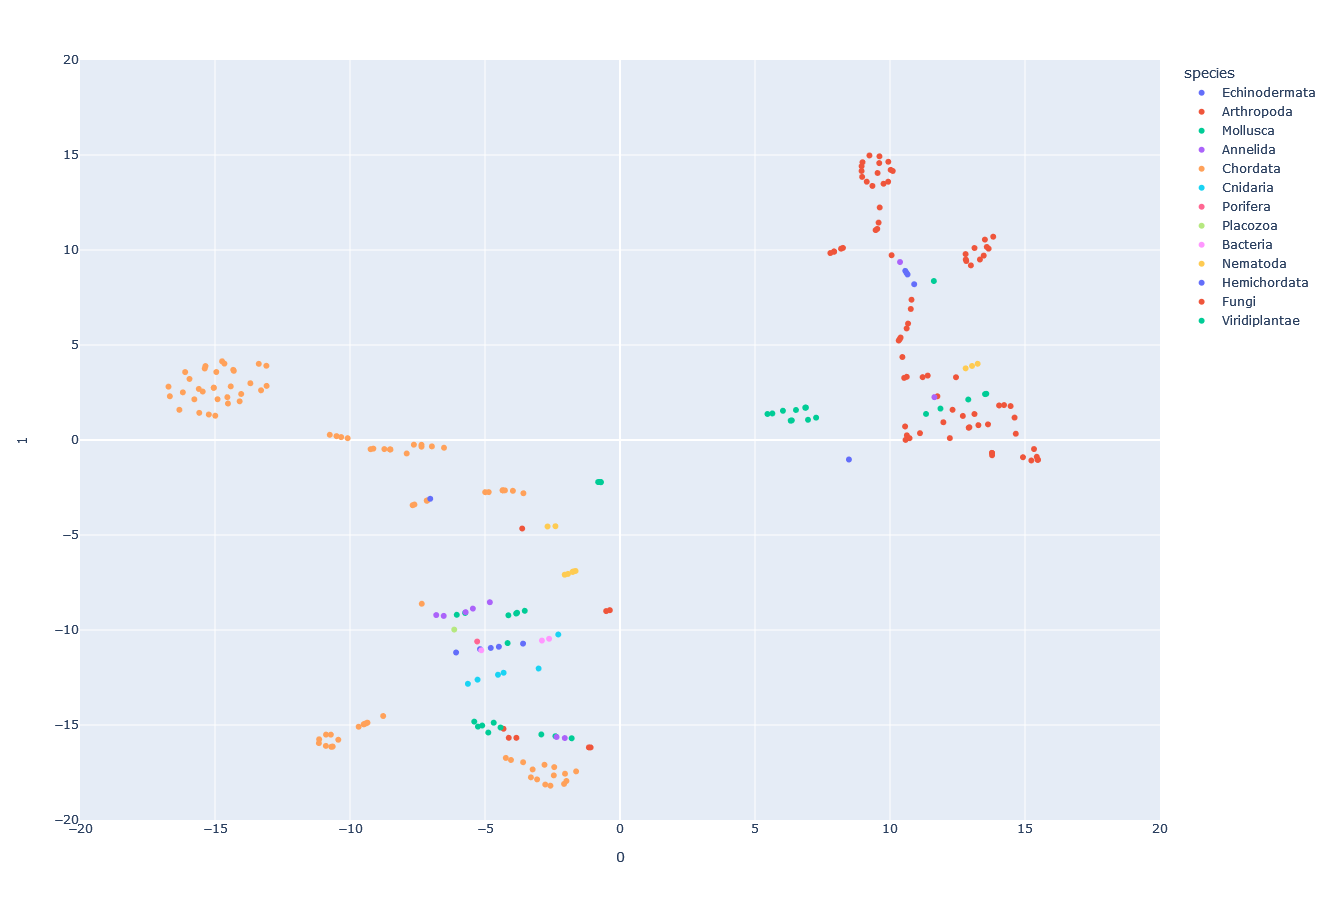

In [12]:
# component = 2 car on veut 2 dimensions
tsne_2d = TSNE(n_components=2, random_state=0)
proj_tsne_phyl_2d = tsne_2d.fit_transform(phyl)

tsne_phyl_2d = px.scatter(
    proj_tsne_phyl_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)
tsne_phyl_2d.update_layout(xaxis_range=[-20, 20], yaxis_range=[-20, 20])
tsne_phyl_2d.update_layout(width=1000, height=900)
tsne_phyl_2d.update_xaxes(dtick=5)
tsne_phyl_2d.show()

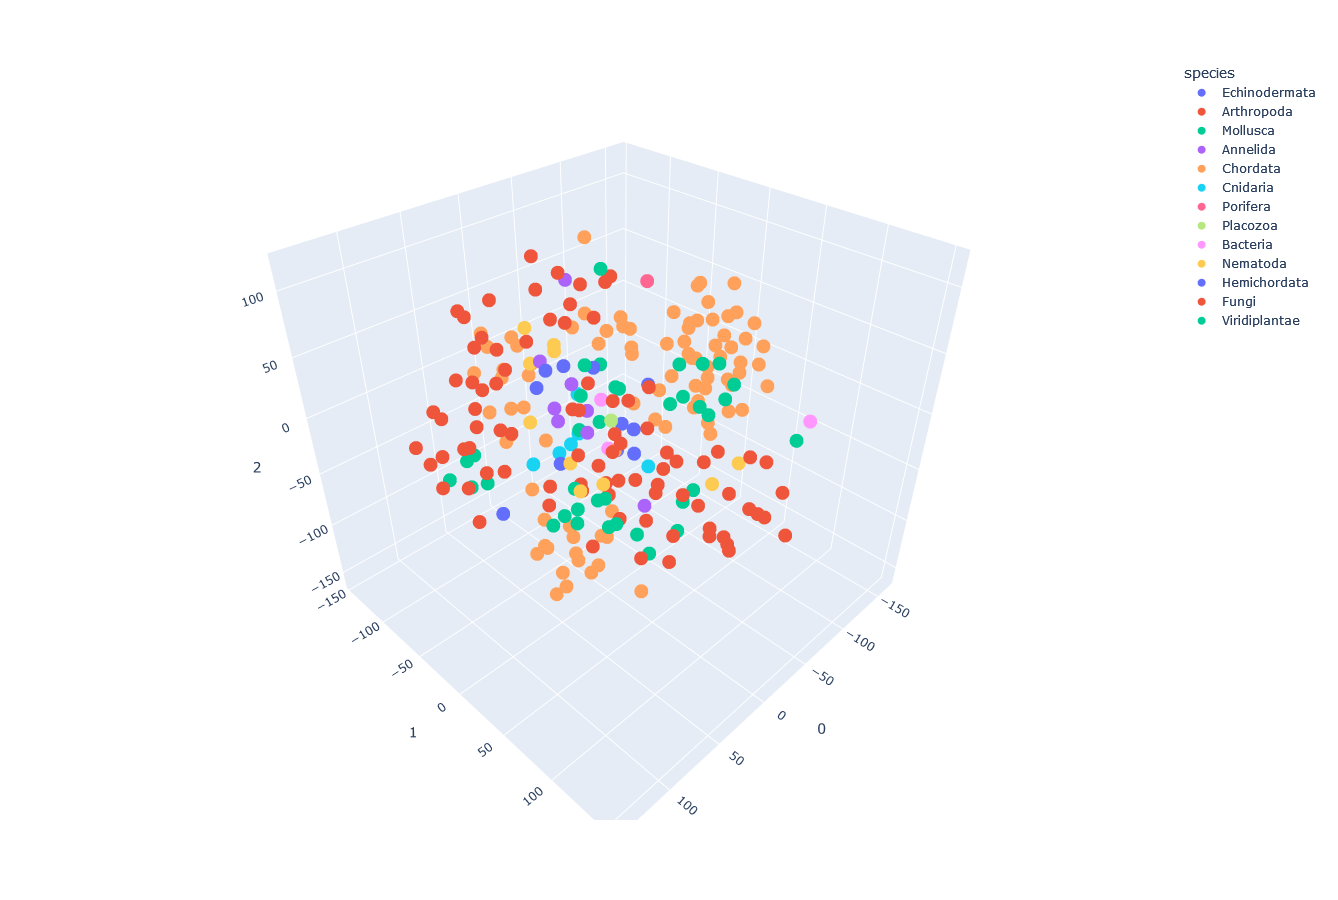

In [8]:
tsne_3d = TSNE(n_components=3, random_state=0)
proj_tsne_phyl_3d = tsne_3d.fit_transform(phyl)

tsne_phyl_3d = px.scatter_3d(
    proj_tsne_phyl_3d, x=0, y=1, z=2,
    color=colour.Color_species, labels={'color': 'species'}
)
tsne_phyl_3d.update_traces(marker_size=8)
tsne_phyl_3d.update_layout(xaxis_range=[-20, 20], yaxis_range=[-20, 20])
tsne_phyl_3d.update_layout(width=1000, height=900)
tsne_phyl_3d.update_xaxes(dtick=5)
tsne_phyl_3d.show()